In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                             padding = 'same', input_shape = (28, 28, 1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

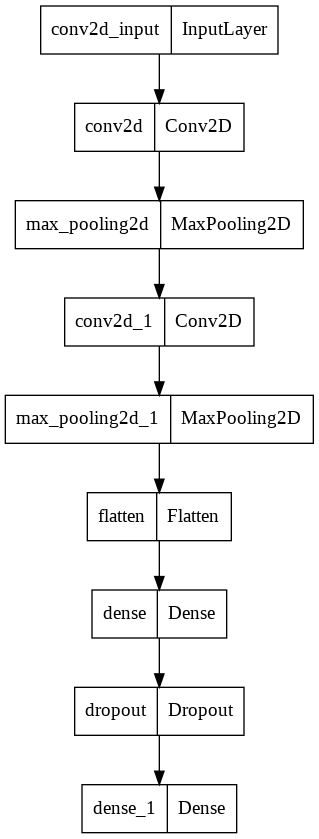

In [7]:
keras.utils.plot_model(model)

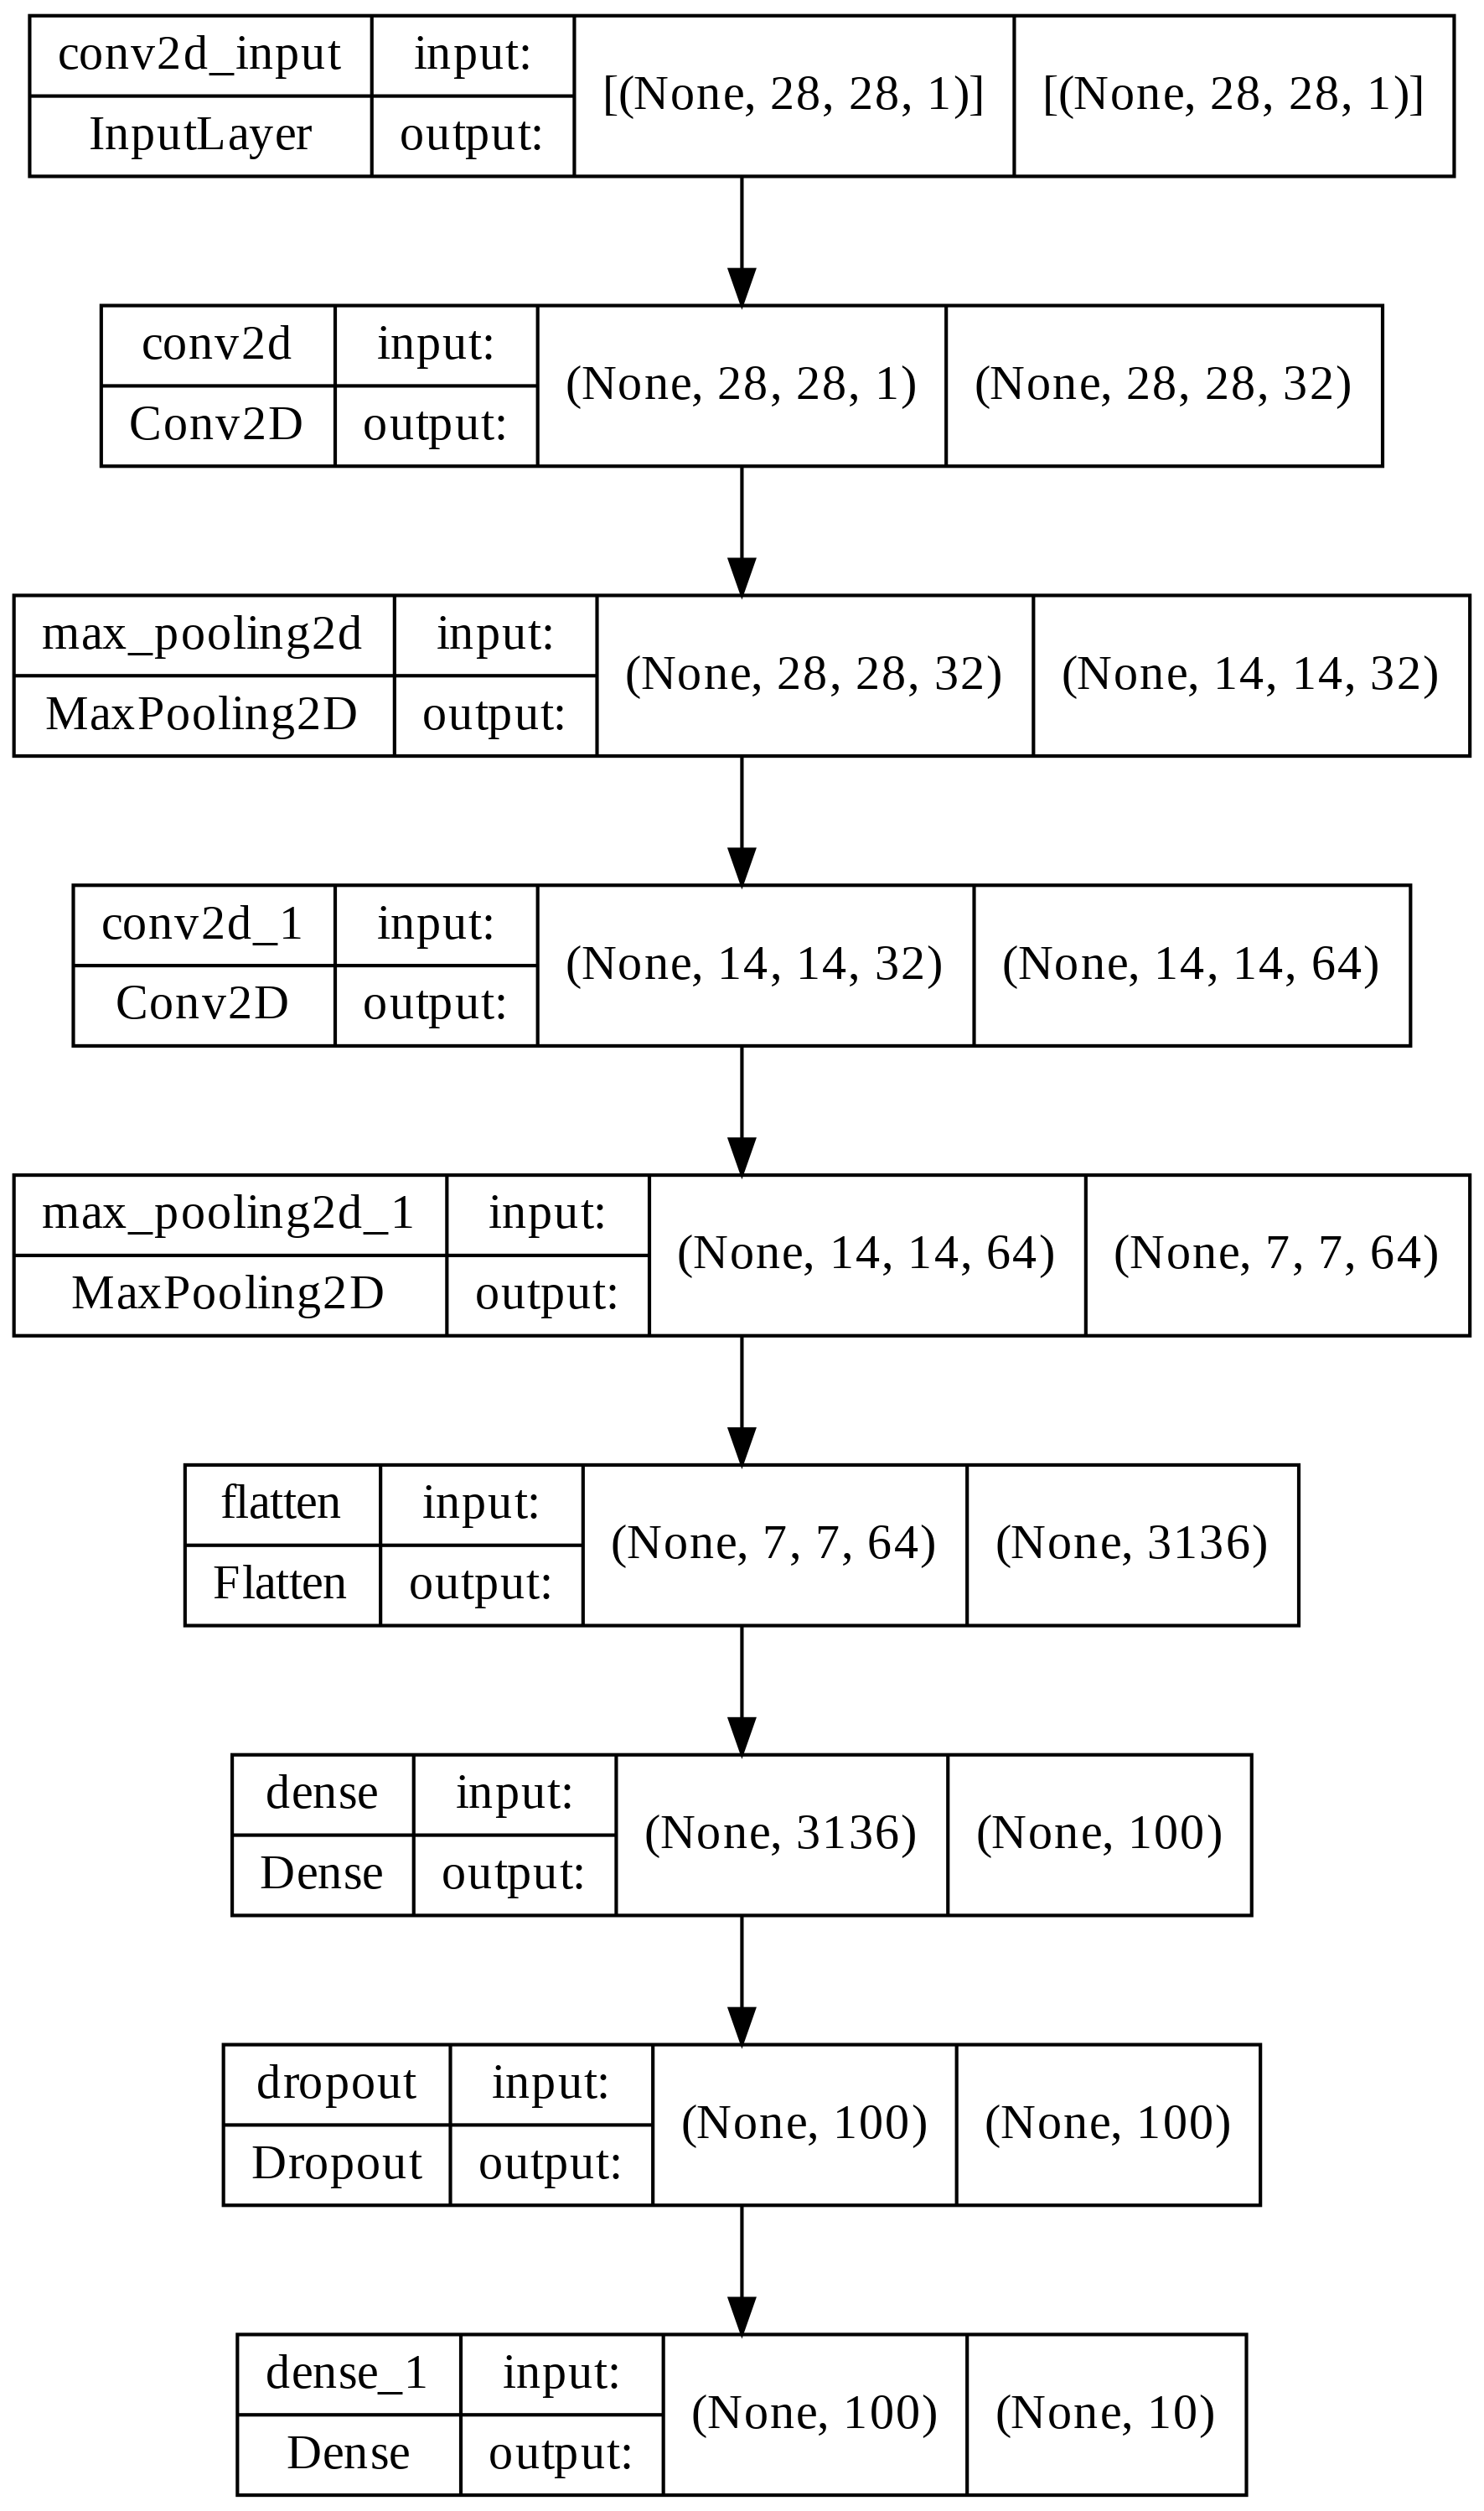

In [8]:
keras.utils.plot_model(model, show_shapes = True,
                       to_file = 'cnn-architecture.png', dpi = 300)

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/20
1500/1500 [==============================] - 21s 7ms/step - loss: 0.5286 - accuracy: 0.8100 - val_loss: 0.3361 - val_accuracy: 0.8793
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3510 - accuracy: 0.8752 - val_loss: 0.2928 - val_accuracy: 0.8931
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3039 - accuracy: 0.8912 - val_loss: 0.2756 - val_accuracy: 0.8930
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2705 - accuracy: 0.9022 - val_loss: 0.2605 - val_accuracy: 0.9034
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2446 - accuracy: 0.9113 - val_loss: 0.2334 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2259 - accuracy: 0.9171 - val_loss: 0.2337 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2090 - accuracy: 0.9234 - val_loss: 0.2270 - val_ac

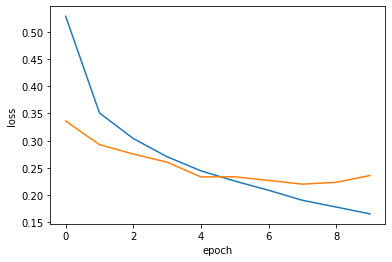

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2202 - accuracy: 0.9174


[0.2202014923095703, 0.9174166917800903]

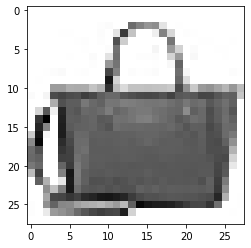

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[8.5660806e-18 1.6718341e-27 3.5131362e-20 2.0273311e-19 1.3893353e-18
  1.3153079e-15 1.1462351e-14 1.9301946e-20 1.0000000e+00 2.7650593e-17]]


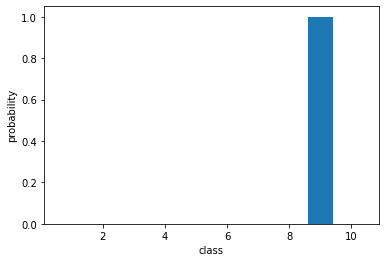

In [19]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('probability')
plt.show()

In [20]:
classes = ['T-Shirt', 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandles', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boots']

In [22]:
import numpy as np
print(classes[np.argmax(preds)])

Bag


In [23]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [24]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 8ms/step - loss: 0.2438 - accuracy: 0.9134


[0.2437926083803177, 0.9133999943733215]